# Importing required Libraries and the Dataset.

In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

import visuals as vs

%matplotlib inline

data = pd.read_csv("autism_data.csv")
display(data.head(5))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [2]:
# Total number of records:
n_records = len(data.index)

# Total number of records with ASD
n_asd_yes = len(data[data['Class/ASD'] == 'YES'])

# Total number of records without ASD
n_asd_no = len(data[data['Class/ASD'] == 'NO'])

# Percentage of individuals with ASD
yes_percentage = float((n_asd_yes) / n_records * 100)

# Printing the outputs
print(f'Total number of records  : {n_records}')
print(f'Number of individuals with ASD : {n_asd_yes}')
print(f'Number of individuals without ASD : {n_asd_no}')
print("Percentage of individuals with ASD : {:.2f}%".format(yes_percentage))

Total number of records  : 704
Number of individuals with ASD : 189
Number of individuals without ASD : 515
Percentage of individuals with ASD : 26.85%


## Featureset Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [4]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


## Preparing the Data

In [5]:
data.isna().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


##### Dropping missing values

In [6]:
data.dropna(inplace=True)
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,0.723647,0.452991,0.458689,0.497151,0.498575,0.284900,0.417379,0.650997,0.324786,0.574074,29.698006,4.883191
std,0.447512,0.498140,0.498646,0.500348,0.500354,0.451689,0.493478,0.476995,0.468629,0.494835,16.507465,2.498051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [7]:
# After Data Cleaning

# Total number of records:
n_records = len(data.index)

# Total number of records with ASD
n_asd_yes = len(data[data['Class/ASD'] == 'YES'])

# Total number of records without ASD
n_asd_no = len(data[data['Class/ASD'] == 'NO'])

# Printing the outputs
print("AFTER REMOVING NULL VALUES : ")
print(f'Total number of records  : {n_records}')
print(f'Number of individuals with ASD : {n_asd_yes}')
print(f'Number of individuals without ASD : {n_asd_no}')


AFTER REMOVING NULL VALUES : 
Total number of records  : 702
Number of individuals with ASD : 189
Number of individuals without ASD : 513


### Visualizations with Seaborn

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

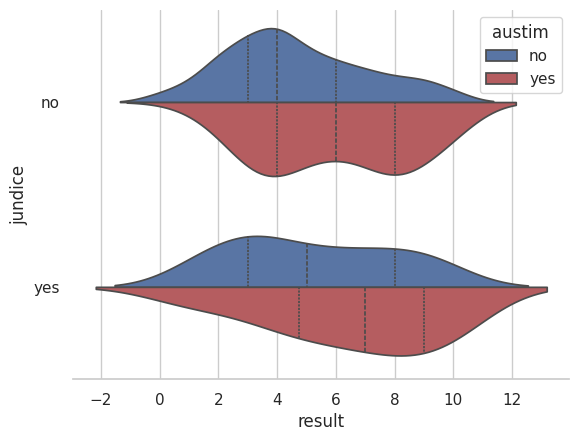

In [9]:
sns.violinplot(x="result", y="jundice", hue="austim", data=data, split=True,inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)

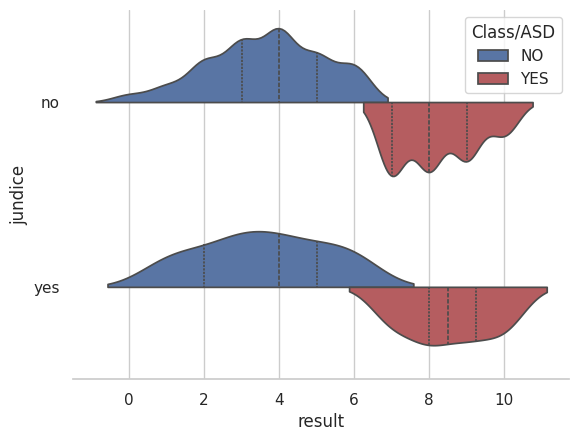

In [10]:
sns.violinplot(x="result", y="jundice", hue="Class/ASD", data=data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

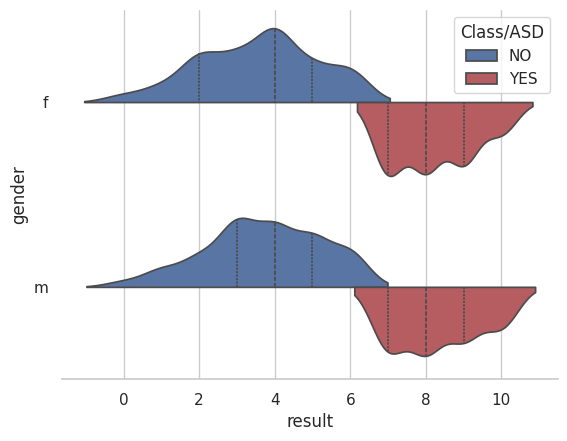

In [11]:

sns.violinplot(x="result", y="gender", hue="Class/ASD", data=data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

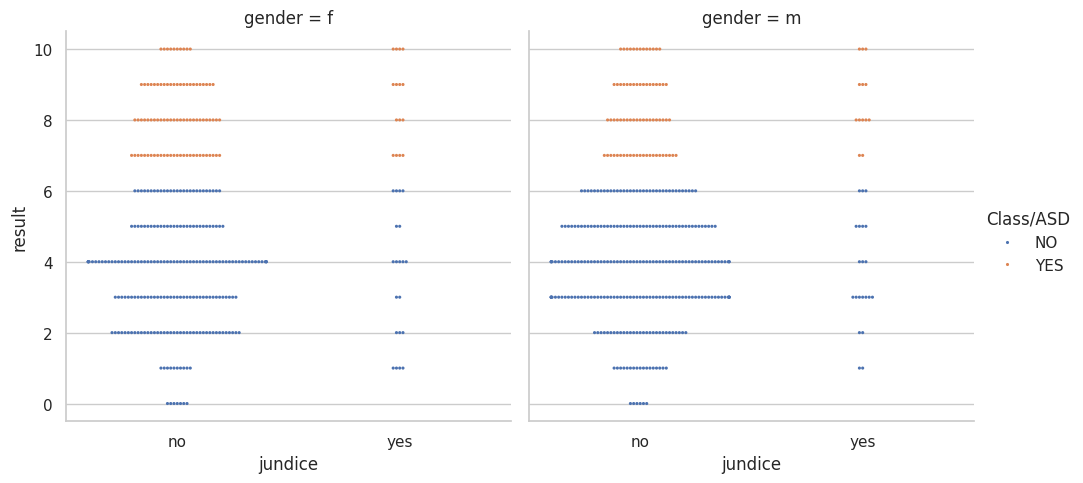

In [12]:
sns.catplot(x="jundice", y="result", hue="Class/ASD", s = 5, col="gender", data=data, kind="swarm");

# Preprocessing

Train set has 561 entries.
Test set has 141 entries.
Before SMOTE:
 Class/ASD
0    412
1    149
Name: count, dtype: int64
After SMOTE:
 Class/ASD
0    412
1    412
Name: count, dtype: int64
95 total features after one-hot encoding
['age', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score'] ...


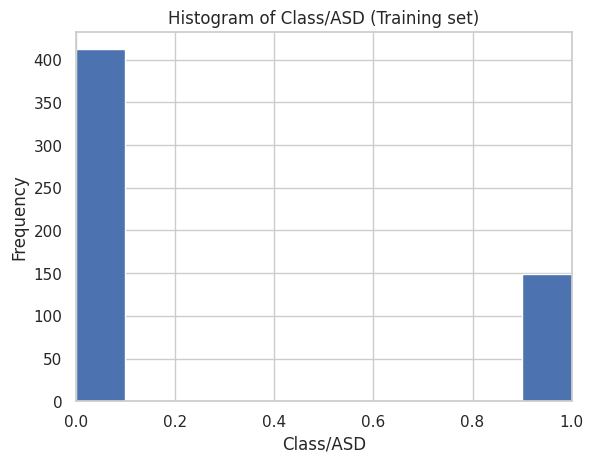

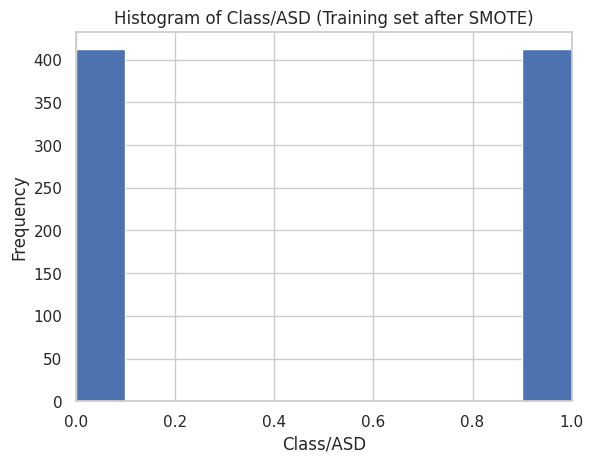

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE  # Import SMOTE

# 1️ Separate features and target
data_raw = data['Class/ASD']
features_raw = data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
                     'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                     'A9_Score','A10_Score']]

# 2️ Encode target variable
data_classes = data_raw.apply(lambda x: 1 if x == 'YES' else 0)

# 3️ Train-test split BEFORE scaling
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(features_raw, data_classes, test_size=0.2, random_state=1)
print("Train set has {} entries.".format(X_train.shape[0]))
print("Test set has {} entries.".format(X_test.shape[0]))

# 4️ Scaling numeric features AFTER split
scaler = MinMaxScaler()
num_cols = ['age']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

# 5️ One-hot encode categorical features
X_train_final = pd.get_dummies(X_train_scaled)
X_test_final = pd.get_dummies(X_test_scaled)

# Ensure both train and test have the same columns
X_test_final = X_test_final.reindex(columns=X_train_final.columns, fill_value=0)

# 6️ Apply SMOTE to balance classes in training set
smote = SMOTE(random_state=1)
X_train_res, y_train_res = smote.fit_resample(X_train_final, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_res.value_counts())

# 7️ Info
encoded = list(X_train_final.columns)
print("{} total features after one-hot encoding".format(len(encoded)))
print(encoded[:10], "...")  # display first 10 columns only

# 8️ Visualize target distribution in original training set
plt.hist(y_train, bins=10)
plt.xlim(0,1)
plt.title('Histogram of Class/ASD (Training set)')
plt.xlabel('Class/ASD')
plt.ylabel('Frequency')
plt.show()

# 9️ Visualize target distribution in SMOTE-resampled training set
plt.hist(y_train_res, bins=10)
plt.xlim(0,1)
plt.title('Histogram of Class/ASD (Training set after SMOTE)')
plt.xlabel('Class/ASD')
plt.ylabel('Frequency')
plt.show()


## Models :
**Hyperparameter Tuning + Model Training + Evaluation**

### 1. Decision Tress

Best DT Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Decision Tree Evaluation Metrics:
Accuracy: 0.8723404255319149
Precision: 0.7894736842105263
Recall: 0.75
F1 Score: 0.7692307692307693
F-beta Score (beta=0.5): 0.78125
Error: 0.12765957446808507


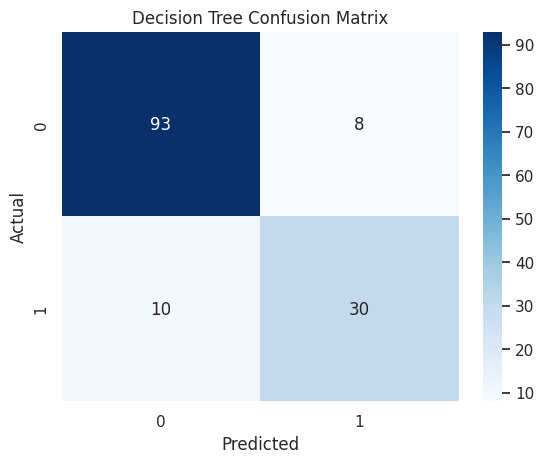

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, fbeta_score
import seaborn as sns
import matplotlib.pyplot as plt

# Hyperparameters for tuning
dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize Decision Tree classifier
dt = DecisionTreeClassifier(random_state=1)

# GridSearchCV with 5-fold cross-validation
grid_dt = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')
grid_dt.fit(X_train_res, y_train_res)  # Train on SMOTE-resampled training set

# Best estimator and parameters
best_dt = grid_dt.best_estimator_
print("Best DT Params:", grid_dt.best_params_)

# Predict on the original test set
y_pred = best_dt.predict(X_test_final)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Computing F-beta score
fbeta = fbeta_score(y_test, y_pred, average='binary', beta=0.5)

# Error
error = 1 - accuracy

print("Decision Tree Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("F-beta Score (beta=0.5):", fbeta)
print("Error:", error)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 2. Random Forest

Best RF Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Evaluation Metrics:
Accuracy: 0.9290780141843972
Precision: 0.8571428571428571
Recall: 0.9
F1 Score: 0.8780487804878049
F-beta Score (beta=0.5): 0.8653846153846154
Error: 0.07092198581560283


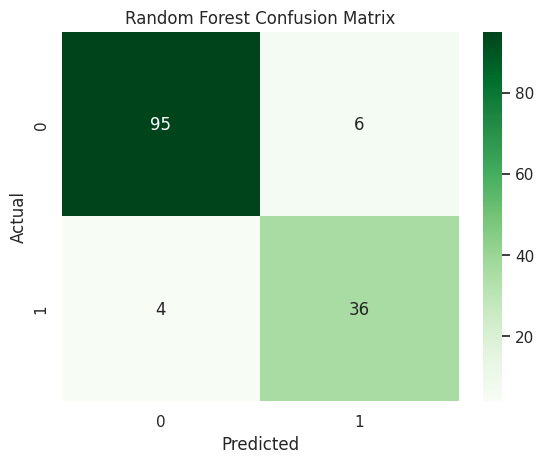

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, fbeta_score
import seaborn as sns
import matplotlib.pyplot as plt

# Hyperparameters for tuning
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=1)

# GridSearchCV with 5-fold cross-validation on SMOTE-resampled training set
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
grid_rf.fit(X_train_res, y_train_res)  # Train on SMOTE-resampled data

# Best estimator and parameters
best_rf = grid_rf.best_estimator_
print("Best RF Params:", grid_rf.best_params_)

# Predict on original test set
y_pred = best_rf.predict(X_test_final)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Computing F-beta score
fbeta = fbeta_score(y_test, y_pred, average='binary', beta=0.5)

# Error
error = 1 - accuracy

print("Random Forest Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("F-beta Score (beta=0.5):", fbeta)
print("Error:", error)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 3. Support Vector Machine

Best SVM Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Evaluation Metrics:
Accuracy: 0.9432624113475178
Precision: 0.8809523809523809
Recall: 0.925
F1 Score: 0.9024390243902439
F-beta Score (beta=0.5): 0.8894230769230769
Error: 0.05673758865248224


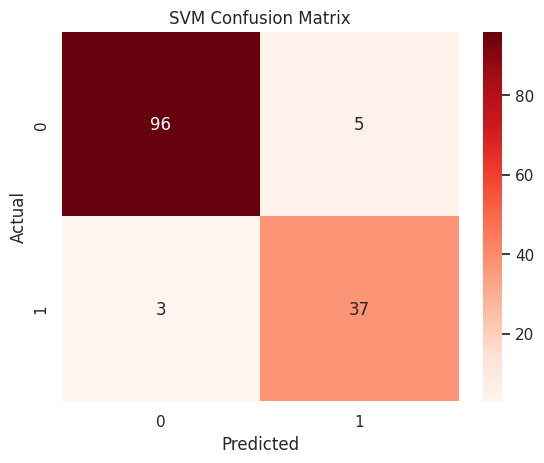

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, fbeta_score
import seaborn as sns
import matplotlib.pyplot as plt

# Hyperparameters for tuning
svm_params = {
    'C': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize SVM
svm = SVC(random_state=1)

# GridSearchCV with 5-fold CV on SMOTE-resampled training set
grid_svm = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
grid_svm.fit(X_train_res, y_train_res)  # Train on SMOTE-resampled data

# Best estimator and parameters
best_svm = grid_svm.best_estimator_
print("Best SVM Params:", grid_svm.best_params_)

# Predict on original test set
y_pred = best_svm.predict(X_test_final)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Computing F-beta score
fbeta = fbeta_score(y_test, y_pred, average='binary', beta=0.5)

# Error
error = 1 - accuracy

print("SVM Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("F-beta Score (beta=0.5):", fbeta)
print("Error:", error)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 4. K-Nearest-Neighbors(KNN)

Best KNN Params: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
KNN Evaluation Metrics:
Accuracy: 0.900709219858156
Precision: 0.7708333333333334
Recall: 0.925
F1 Score: 0.8409090909090909
F-beta Score (beta=0.5): 0.7974137931034483
Error: 0.099290780141844


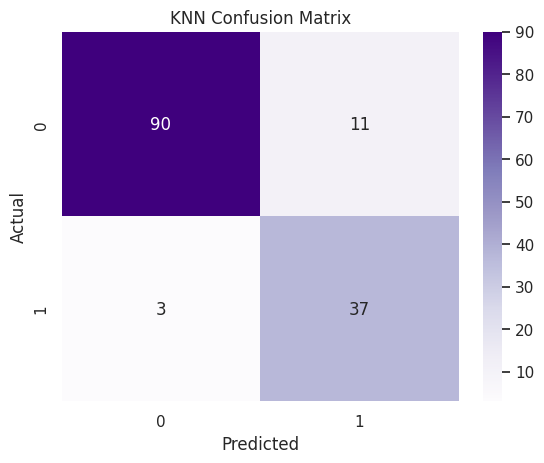

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, fbeta_score
import seaborn as sns
import matplotlib.pyplot as plt

# Hyperparameters for tuning
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan or Euclidean
}

# Initialize KNN
knn = KNeighborsClassifier()

# GridSearchCV with 5-fold CV on SMOTE-resampled training set
grid_knn = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
grid_knn.fit(X_train_res, y_train_res)  # Train on SMOTE-resampled data

# Best estimator and parameters
best_knn = grid_knn.best_estimator_
print("Best KNN Params:", grid_knn.best_params_)

# Predict on original test set
y_pred = best_knn.predict(X_test_final)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Computing F-beta score
fbeta = fbeta_score(y_test, y_pred, average='binary', beta=0.5)

# Error
error = 1 - accuracy

print("KNN Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("F-beta Score (beta=0.5):", fbeta)
print("Error:", error)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 5. Naive Bayes

Best NB Params: {'alpha': 0.5}
Naive Bayes Evaluation Metrics:
Accuracy: 0.7730496453900709
Precision: 0.5625
Recall: 0.9
F1 Score: 0.6923076923076923
F-beta Score (beta=0.5): 0.6081081081081081
Error: 0.22695035460992907


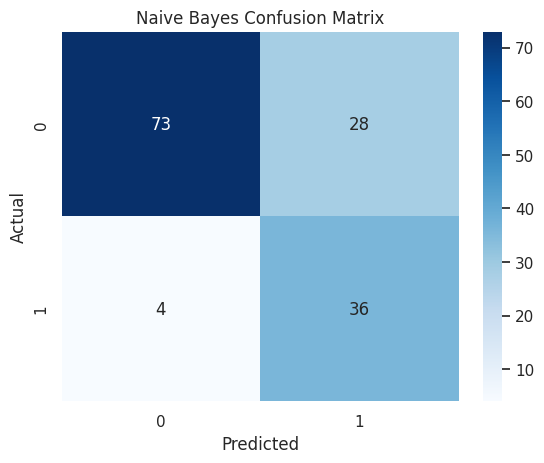

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, fbeta_score
import seaborn as sns
import matplotlib.pyplot as plt

# Hyperparameters for tuning
nb_params = {
    'alpha': [0.1, 0.5, 1.0]
}

# Initialize Naive Bayes
nb = MultinomialNB()

# GridSearchCV with 5-fold CV on SMOTE-resampled training set
grid_nb = GridSearchCV(nb, nb_params, cv=5, scoring='accuracy')
grid_nb.fit(X_train_res, y_train_res)  # Train on SMOTE-resampled data

# Best estimator and parameters
best_nb = grid_nb.best_estimator_
print("Best NB Params:", grid_nb.best_params_)

# Predict on original test set
y_pred = best_nb.predict(X_test_final)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Computing F-beta score
fbeta = fbeta_score(y_test, y_pred, average='binary', beta=0.5)

# Error
error = 1 - accuracy

print("Naive Bayes Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("F-beta Score (beta=0.5):", fbeta)
print("Error:", error)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 6. Logistic Regression

Best Logistic Regression Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression Evaluation Metrics:
Accuracy: 0.9716312056737588
Precision: 0.9090909090909091
Recall: 1.0
F1 Score: 0.9523809523809523
F-beta Score (beta=0.5): 0.9259259259259259
Error: 0.028368794326241176


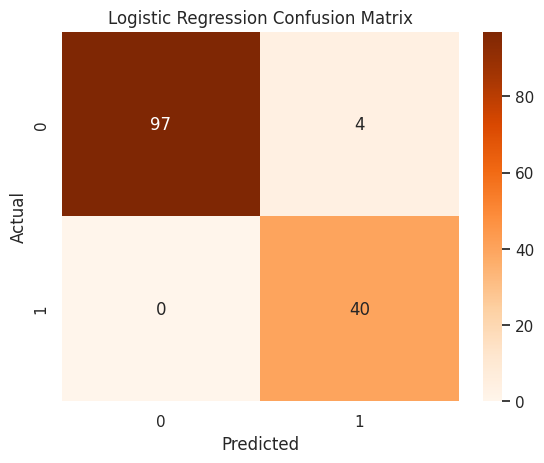

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, fbeta_score
import seaborn as sns
import matplotlib.pyplot as plt

# Hyperparameters for tuning
log_params = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Initialize Logistic Regression
log = LogisticRegression(max_iter=2000, random_state=1)

# GridSearchCV with 5-fold CV on SMOTE-resampled training set
grid_log = GridSearchCV(log, log_params, cv=5, scoring='accuracy')
grid_log.fit(X_train_res, y_train_res)  # Train on SMOTE-resampled data

# Best estimator and parameters
best_log = grid_log.best_estimator_
print("Best Logistic Regression Params:", grid_log.best_params_)

# Predict on original test set
y_pred = best_log.predict(X_test_final)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Computing F-beta score
fbeta = fbeta_score(y_test, y_pred, average='binary', beta=0.5)

# Error
error = 1 - accuracy

print("Logistic Regression Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("F-beta Score (beta=0.5):", fbeta)
print("Error:", error)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
